# Far out applications

In many ways we have already applied the lessons of Far out in stabilizing the finite boundaries.

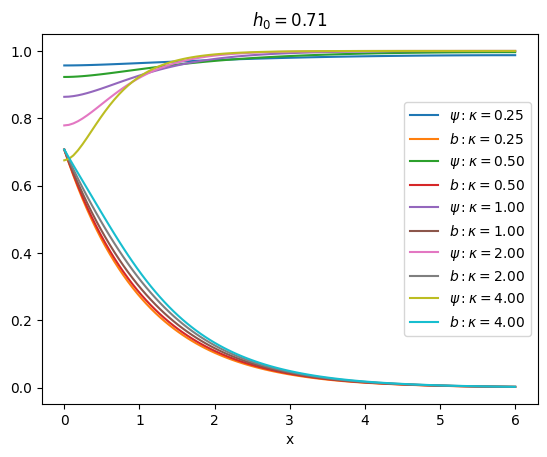

In [2]:
# basic usage vacuum boundary at $x=0$. As published the applied field is critical.

import matplotlib.pyplot as plt
from glcd import glplot,nat,SC

hc=1/2**(1/2)
for k in range(-2,3):
  kappa=2**k
  glplot(kappa,nat(0,hc),SC(6),f"\kappa={kappa:.2f}") # natural boundary x=0,superconducting at x=6 (x 'large')
plt.xlabel("x")
plt.title(f"$h_0={hc:.2f}$")
plt.legend()
plt.show()

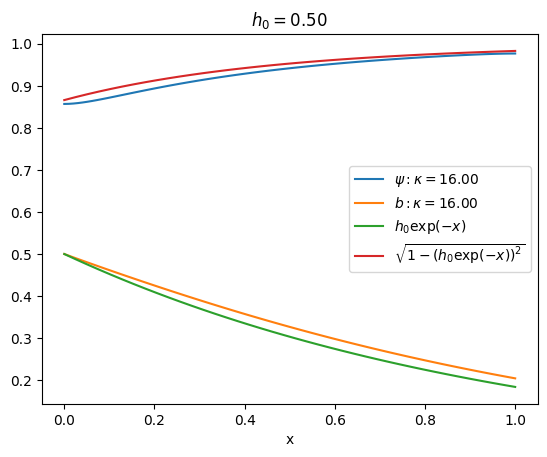

In [8]:
import numpy as np

def SC(x): # superconducting psi=1,b proportional to exp(-x), for x going to +infinity.
  def BC(Y):
    return [Y[1],Y[3]+Y[2]]
  return (x,BC)

h0=0.5
kappa=2**4
L=1
glplot(kappa,nat(0,h0),SC(L),f"\kappa={kappa:.2f}") # natural boundary x=0,superconducting beyond x=6 (x 'large')
X=np.linspace(0,L,40)
B=np.exp(-X)*h0
P=(1-B**2)**(1/2)
plt.plot(X,B,label="$h_0\exp(-x)$")
plt.plot(X,P,label="$\sqrt{1-(h_0\exp(-x))^2}$") # for kappa large psi''/kappa approximately 0.
plt.xlabel("x")
plt.title(f"$h_0={h0:.2f}$")
plt.legend()
plt.show()

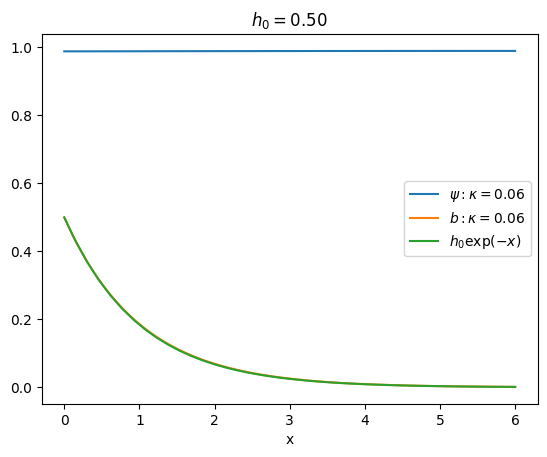

In [11]:
import numpy as np

def SC(x): # superconducting psi=1,b proportional to exp(-x), for x going to +infinity.
  def BC(Y):
    return [Y[1],Y[3]+Y[2]]
  return (x,BC)

h0=0.5
kappa=2**-4
L=6
glplot(kappa,nat(0,h0),SC(L),f"\kappa={kappa:.2f}") # natural boundary x=0,superconducting beyond x=6 (x 'large')
X=np.linspace(0,L,40)
B=np.exp(-X)*h0
plt.plot(X,B,label="$h_0\exp(-x)$") # almost exact since psi approximately 1 since psi'' approximately 0 throughout and psi'=0 at x=0
plt.xlabel("x")
plt.title(f"$h_0={h0:.2f}$")
plt.legend()
plt.show()

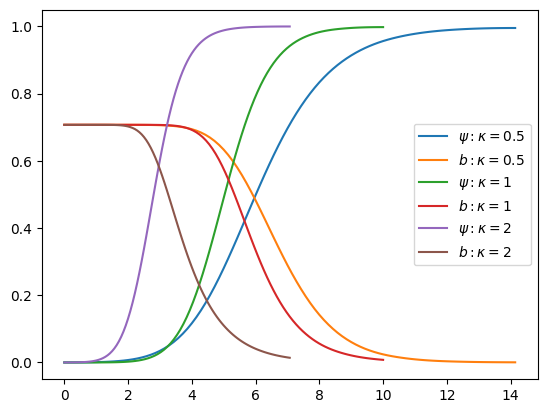

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from glcd import glplot,glsol,nat,SC,nrm

h0=1/2**(1/2)

for k in range(-1,2):
  kappa=2**k
  glplot(kappa,nrm(0,40,h0),SC(10/kappa**(1/2)),f"\kappa={kappa}")

plt.legend()
plt.show()

In [25]:
def plotn(sol,n,tex):
  x_plot = np.linspace(sol.x[0],sol.x[-1], 40)
  y_plot = sol.sol(x_plot)[n] # plot index n of solution
  plt.plot(x_plot, y_plot,label=f"${tex}$")

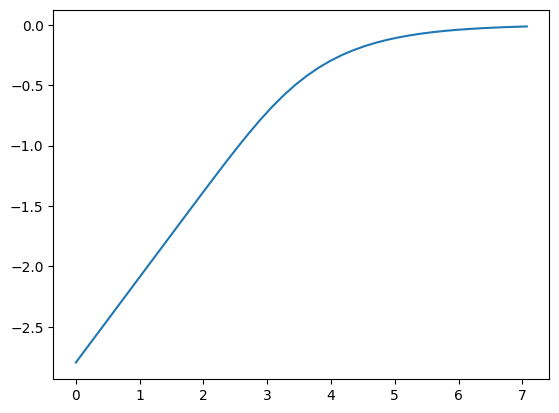

In [26]:
from scipy.integrate import solve_bvp

def glsol(kappa,A,B):
  xa,AB=A
  xb,BB=B
  nodes=5
  def dY(x,Y): # Y=[f,df,a,b=da]
    f,df,a,b = Y
    return np.vstack((df, kappa*kappa*f*(f**2+a**2-1),b,a*f**2))
  def bc(Ya, Yb):
    return np.array(AB(Ya)+BB(Yb))
  rng=[xa, xb]
  X = np.linspace(*rng, nodes)
  Y0=[1 if x<0 else 1 for x in X]
  Y = np.vstack([Y0,np.zeros((3, X.size))])
  return solve_bvp(dY, bc, X, Y)

sol=glsol(kappa,nrm(0,40,h0),SC(10/kappa**(1/2)))
plotn(sol,2,"a")

In [18]:
len(sol.x)

357

In [19]:
sol.x[-1]

7.071067811865475

In [22]:
10/kappa**(1/2)/357

0.01980691263827864

In [24]:
for k in range(len(sol.x)-1):
  print(sol.x[k+1]-sol.x[k])

0.29462782549439476
0.14731391274719735
0.1473139127471974
0.07365695637359859
0.0736569563735987
0.03682847818679935
0.03682847818679935
0.03682847818679935
0.03682847818679935
0.03682847818679935
0.03682847818679935
0.03682847818679935
0.03682847818679935
0.03682847818679935
0.03682847818679935
0.03682847818679935
0.03682847818679935
0.03682847818679935
0.018414239093399676
0.018414239093399676
0.018414239093399676
0.018414239093399676
0.00460355977335003
0.004603559773349808
0.004603559773349808
0.002301779886674904
0.002301779886675126
0.002301779886675126
0.002301779886674904
0.002301779886674904
0.002301779886674904
0.002301779886674904
0.002301779886674904
0.002301779886674904
0.002301779886675126
0.002301779886675126
0.002301779886674904
0.002301779886674904
0.002301779886674904
0.002301779886674904
0.002301779886674904
0.002301779886674904
0.002301779886675126
0.002301779886675126
0.002301779886674904
0.002301779886674904
0.002301779886674904
0.002301779886674904
0.00230177988